In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [74]:
data =pd.read_pickle(r"C:\Users\lebom\Downloads\PRT2030_Nov_Exam_2024\PRT2030_Nov_Exam_2024\data.pkl")
data

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,0.72,Good,D,SI1,63.1,55.0,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,0.86,Premium,H,SI2,61.0,58.0,2757


C:\Users\lebom\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


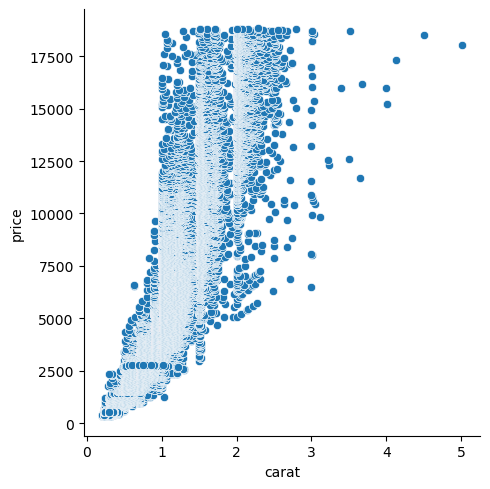

In [75]:
sns.relplot(data=data, x='carat', y='price')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
dtypes: category(3), float64(3), int64(1)
memory usage: 1.8 MB


In [77]:
data= data.drop(columns =['cut','color','clarity'])
data

,carat,depth,table,price
0,0.23,61.5,55.0,326
1,0.21,59.8,61.0,326
2,0.23,56.9,65.0,327
3,0.29,62.4,58.0,334
4,0.31,63.3,58.0,335
...,...,...,...,...
53935,0.72,60.8,57.0,2757
53936,0.72,63.1,55.0,2757
53937,0.70,62.8,60.0,2757
53938,0.86,61.0,58.0,2757


In [78]:
data.corr()[['price']].sort_values('price',ascending=False)

,price
price,1.000000
carat,0.921591
table,0.127134
depth,-0.010647


<Axes: >

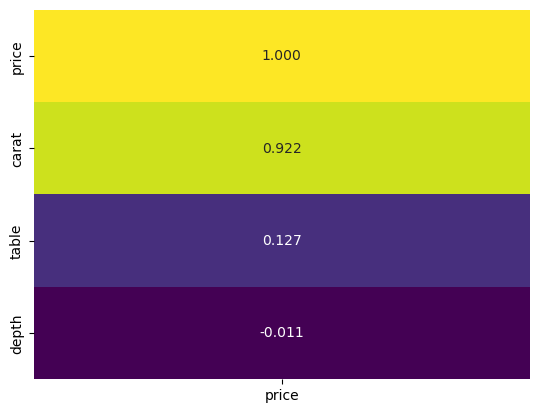

In [79]:
sns.heatmap(data=data.corr()[['price']].sort_values(by='price',ascending=False),annot=True,cmap='viridis',cbar=False,fmt='.3f')

In [80]:
x_train,x_test,y_train,y_test=train_test_split(
    data[['carat','table','depth']],data[['price']],
    test_size=0.30,random_state=20)

In [81]:
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)
model.score(x_train,y_train)

0.8533999266287104

In [82]:
model=LinearRegression()
model.fit(x_test,y_test)
model.score(x_train,y_train)
model.score(x_test,y_test)

0.8543799666101143

In [83]:
y_predicted=model.predict(x_test)
predicted=pd.DataFrame(y_predicted,columns=['predicted_Price'])
final=predicted.join([x_test.reset_index(drop=True),
                      y_test.reset_index(drop=True)])
final[['carat', 'table', 'depth','price','predicted_Price']].head()

,carat,table,depth,price,predicted_Price
0,1.52,66.0,62.1,8674,8730.664269
1,0.54,58.0,62.0,1637,1803.864340
2,0.70,60.0,62.0,2657,2871.777435
3,0.59,58.0,62.2,1838,2166.955196
4,0.86,58.0,61.8,2980,4346.274389


In [84]:
final['residual']=final.price-final.predicted_Price
final.head()

,predicted_Price,carat,table,depth,price,residual
0,8730.664269,1.52,66.0,62.1,8674,-56.664269
1,1803.864340,0.54,58.0,62.0,1637,-166.864340
2,2871.777435,0.70,60.0,62.0,2657,-214.777435
3,2166.955196,0.59,58.0,62.2,1838,-328.955196
4,4346.274389,0.86,58.0,61.8,2980,-1366.274389


C:\Users\lebom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='residual', ylabel='Density'>

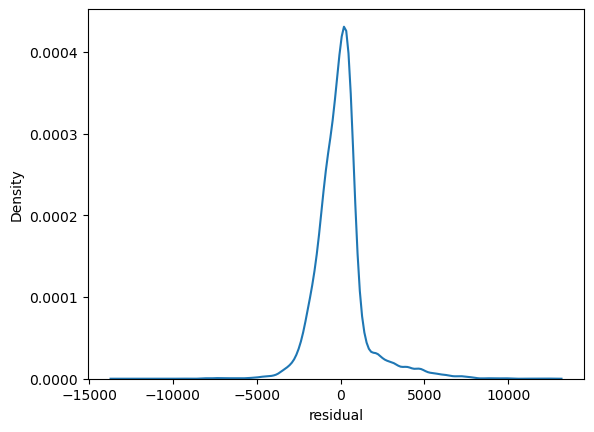

In [85]:
sns.kdeplot(data=final,x='residual')

In [86]:
diamonds =pd.read_pickle(r"C:\Users\lebom\Downloads\PRT2030_Nov_Exam_2024\PRT2030_Nov_Exam_2024\data.pkl")
diamonds

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,0.72,Good,D,SI1,63.1,55.0,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,0.86,Premium,H,SI2,61.0,58.0,2757


In [87]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
dtypes: category(3), float64(3), int64(1)
memory usage: 1.8 MB


In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
catColumns=['cut','color','clarity']
dummies=pd.get_dummies(diamonds[catColumns])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   cut_Ideal      53940 non-null  bool 
 1   cut_Premium    53940 non-null  bool 
 2   cut_Very Good  53940 non-null  bool 
 3   cut_Good       53940 non-null  bool 
 4   cut_Fair       53940 non-null  bool 
 5   color_D        53940 non-null  bool 
 6   color_E        53940 non-null  bool 
 7   color_F        53940 non-null  bool 
 8   color_G        53940 non-null  bool 
 9   color_H        53940 non-null  bool 
 10  color_I        53940 non-null  bool 
 11  color_J        53940 non-null  bool 
 12  clarity_IF     53940 non-null  bool 
 13  clarity_VVS1   53940 non-null  bool 
 14  clarity_VVS2   53940 non-null  bool 
 15  clarity_VS1    53940 non-null  bool 
 16  clarity_VS2    53940 non-null  bool 
 17  clarity_SI1    53940 non-null  bool 
 18  clarity_SI2    53940 non-null  bool 
 19  clar

In [90]:
diamondsDummies = diamonds.drop(columns=catColumns)
diamondsDummies=diamondsDummies.join(dummies)
diamondsDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   cut_Ideal      53940 non-null  bool   
 5   cut_Premium    53940 non-null  bool   
 6   cut_Very Good  53940 non-null  bool   
 7   cut_Good       53940 non-null  bool   
 8   cut_Fair       53940 non-null  bool   
 9   color_D        53940 non-null  bool   
 10  color_E        53940 non-null  bool   
 11  color_F        53940 non-null  bool   
 12  color_G        53940 non-null  bool   
 13  color_H        53940 non-null  bool   
 14  color_I        53940 non-null  bool   
 15  color_J        53940 non-null  bool   
 16  clarity_IF     53940 non-null  bool   
 17  clarity_VVS1   53940 non-null  bool   
 18  clarit

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
numcols=['carat','depth','table']
diamondsDummies[numCols]=scaler.fit_transform(diamondsDummies[numcols])
diamondsDummies.head()

,carat,depth,table,price,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_D,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,-1.198168,-0.174092,-1.099672,326,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-1.240361,-1.360738,1.585529,326,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-1.198168,-3.385019,3.375663,327,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,-1.071587,0.454133,0.242928,334,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,-1.029394,1.082358,0.242928,335,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False


In [93]:
diamondsDummies=diamonds.drop(columns=catColumns)
diamondsDummies=diamondsDummies.join(dummies)
diamondsDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   cut_Ideal      53940 non-null  bool   
 5   cut_Premium    53940 non-null  bool   
 6   cut_Very Good  53940 non-null  bool   
 7   cut_Good       53940 non-null  bool   
 8   cut_Fair       53940 non-null  bool   
 9   color_D        53940 non-null  bool   
 10  color_E        53940 non-null  bool   
 11  color_F        53940 non-null  bool   
 12  color_G        53940 non-null  bool   
 13  color_H        53940 non-null  bool   
 14  color_I        53940 non-null  bool   
 15  color_J        53940 non-null  bool   
 16  clarity_IF     53940 non-null  bool   
 17  clarity_VVS1   53940 non-null  bool   
 18  clarit

In [94]:
catColumns=['cut','color','clarity']
dummy= pd.get_dummies(diamonds[catColumns])
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   cut_Ideal      53940 non-null  bool 
 1   cut_Premium    53940 non-null  bool 
 2   cut_Very Good  53940 non-null  bool 
 3   cut_Good       53940 non-null  bool 
 4   cut_Fair       53940 non-null  bool 
 5   color_D        53940 non-null  bool 
 6   color_E        53940 non-null  bool 
 7   color_F        53940 non-null  bool 
 8   color_G        53940 non-null  bool 
 9   color_H        53940 non-null  bool 
 10  color_I        53940 non-null  bool 
 11  color_J        53940 non-null  bool 
 12  clarity_IF     53940 non-null  bool 
 13  clarity_VVS1   53940 non-null  bool 
 14  clarity_VVS2   53940 non-null  bool 
 15  clarity_VS1    53940 non-null  bool 
 16  clarity_VS2    53940 non-null  bool 
 17  clarity_SI1    53940 non-null  bool 
 18  clarity_SI2    53940 non-null  bool 
 19  clar

In [95]:
dataDummy = diamonds.drop(columns=catColumns)
dataDummy = dataDummy.join(dummy)
dataDummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   cut_Ideal      53940 non-null  bool   
 5   cut_Premium    53940 non-null  bool   
 6   cut_Very Good  53940 non-null  bool   
 7   cut_Good       53940 non-null  bool   
 8   cut_Fair       53940 non-null  bool   
 9   color_D        53940 non-null  bool   
 10  color_E        53940 non-null  bool   
 11  color_F        53940 non-null  bool   
 12  color_G        53940 non-null  bool   
 13  color_H        53940 non-null  bool   
 14  color_I        53940 non-null  bool   
 15  color_J        53940 non-null  bool   
 16  clarity_IF     53940 non-null  bool   
 17  clarity_VVS1   53940 non-null  bool   
 18  clarit

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()
numCols = ['carat','depth','table']
dataDummy[numCols] = scaler.fit_transform(dataDummy[numCols])
dataDummy.head()

,carat,depth,table,price,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_D,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,-1.198168,-0.174092,-1.099672,326,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-1.240361,-1.360738,1.585529,326,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-1.198168,-3.385019,3.375663,327,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,-1.071587,0.454133,0.242928,334,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,-1.029394,1.082358,0.242928,335,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False


In [98]:
dataDummy.corr()[['price']].sort_values(by='price',ascending=False)

,price
price,1.000000
carat,0.921591
clarity_SI2,0.128420
table,0.127134
color_I,0.097125
cut_Premium,0.095706
color_J,0.081710
color_H,0.059223
cut_Fair,0.018728
clarity_SI1,0.008957


In [99]:
x_train,x_test = train_test_split(dataDummy,test_size=0.30,random_state=20)

model=LinearRegression()
xCols=['carat','clarity_SI2','table','color_I','cut_Premium']
model.fit(x_train[xCols],x_train['price'])

model.score(x_test[xCols],x_test['price'])
model.score(x_train[xCols],x_train['price'])


0.8681842247400542

In [100]:
model=LinearRegression()
xCols=['carat','clarity_SI2','table','color_I','cut_Premium']
model.fit(x_test[xCols],x_test['price'])

model.score(x_train[xCols],x_train['price'])
model.score(x_test[xCols],x_test['price'])

0.871080526795012

In [104]:
predicted =pd.DataFrame(y_predicted,columns=['predicted_Price'])
final=predicted.join([x_test[xCols].reset_index(drop=True),x_test['price'].reset_index(drop=True)])
final[['carat','clarity_SI2','table','color_I','cut_Premium','price','predicted_Price']].head()

,carat,clarity_SI2,table,color_I,cut_Premium,price,predicted_Price
0,1.523312,False,3.823196,False,False,8674,8730.664269
1,-0.544169,False,0.242928,False,True,1637,1803.864340
2,-0.206621,False,1.137995,False,True,2657,2871.777435
3,-0.438685,False,0.242928,False,False,1838,2166.955196
4,0.130927,True,0.242928,False,True,2980,4346.274389


In [105]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


In [107]:
dataDummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   cut_Ideal      53940 non-null  bool   
 5   cut_Premium    53940 non-null  bool   
 6   cut_Very Good  53940 non-null  bool   
 7   cut_Good       53940 non-null  bool   
 8   cut_Fair       53940 non-null  bool   
 9   color_D        53940 non-null  bool   
 10  color_E        53940 non-null  bool   
 11  color_F        53940 non-null  bool   
 12  color_G        53940 non-null  bool   
 13  color_H        53940 non-null  bool   
 14  color_I        53940 non-null  bool   
 15  color_J        53940 non-null  bool   
 16  clarity_IF     53940 non-null  bool   
 17  clarity_VVS1   53940 non-null  bool   
 18  clarit

In [116]:
train, test= train_test_split(dataDummy,
                                  test_size=0.30,random_state=20)

In [118]:
fs=SelectKBest(score_func=mutual_info_regression,k=15)
fs.fit(train.drop(columns=['price']),train['price'])
x_train_fs=fs.transform(train.drop(columns=['price']))
x_test_fs=fs.transform(test.drop(columns=['price']))

In [119]:
model=LinearRegression()
model.fit(x_train_fs,train['price'])
model.score(x_test_fs,test['price'])
model.score(x_train_fs,train['price'])

0.8937376385057032

In [120]:
model=LinearRegression()
model.fit(x_test_fs,test['price'])
model.score(x_train_fs,train['price'])
model.score(x_test_fs,test['price'])

0.8973744940466785

In [121]:
df1=pd.DataFrame(train.drop(columns=['price']).columns,
                 columns=['Feature'])

In [122]:
df2=pd.DataFrame(fs.scores_,columns=['Significance'])

In [123]:
significance=df1.join(df2)
significance.sort_values('Significance',ascending=False)

,Feature,Significance
0,carat,1.904697
20,clarity_SI1,0.094939
19,clarity_VS2,0.084505
21,clarity_SI2,0.078372
9,color_E,0.072806
8,color_D,0.066267
10,color_F,0.058680
11,color_G,0.053573
16,clarity_VVS1,0.053399
12,color_H,0.050373


In [125]:
model=LinearRegression()
testScores=[]
trainScores=[]

In [127]:
for i in range(1,len(x_train.columns)):
    fs = SelectKBest(score_func=mutual_info_regression,k=i)
    fs.fit(x_train.drop(columns=['price']),x_train['price'])
    x_train_fs=fs.transform(x_train.drop(columns=['price']))
    x_test_fs=fs.transform(x_test.drop(columns=['price']))
    model.fit(x_train_fs,x_train['price'])
    testScore=model.score(x_test_fs,x_test['price'])
    trainScore=model.score(x_train_fs,x_train['price'])
    testScores.append(testScore)
    trainScores.append(trainScore)

In [130]:
df=pd.DataFrame(data={'testScores':test,'trainScores':train})
df.reset_index(inplace=True)
df.rename(columns={'index':'numFeatures'},inplace=True)
df['numFeatures']=df['numFeatures']+1
df.plot(x='numFeatures',y=['testScores','trainScores'])

ValueError: If using all scalar values, you must pass an index